# Imports

In [1]:
import pandas as pd
import numpy as np


## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Simulate data

In [2]:
## setting seed for reproducibility
np.random.seed(1129)
shop_names = ['Compass', 'Starbucks', 'Baked and Wired', 'Peets', 
              'Blue Bottle', 'Saxbys']
coffee_df = pd.concat([pd.DataFrame({'shop_name': shop_names,
                         'opening_time': np.random.choice(["8:00 AM", "9:00 AM", "10:00 AM"],
                                                       len(shop_names),
                                                       replace = True),
                         'closing_time': np.random.choice(["5:00 PM", "6:00 PM", 
                                                          "7:00 PM"],
                                                         len(shop_names),
                                                          replace = True),
                         'hourly_wage': np.random.uniform(14, 20,
                                                          len(shop_names)),
                        'year': 2019}),
                      pd.DataFrame({'shop_name': shop_names,
                         'opening_time': np.random.choice(["8:00 AM", "9:00 AM", "10:00 AM"],
                                                       len(shop_names),
                                                       replace = True),
                         'closing_time': np.random.choice(["3:00 PM", "4:00 PM",
                                                           "6:00 PM", 
                                                          "7:00 PM"],
                                                         len(shop_names),
                                                          replace = True),
                         'hourly_wage': np.random.uniform(14, 20,
                                                          len(shop_names)),
                        'year': 2021})]).sort_values(by = 'shop_name')
                      

coffee_df

,shop_name,opening_time,closing_time,hourly_wage,year
2,Baked and Wired,10:00 AM,5:00 PM,16.308214,2019
2,Baked and Wired,10:00 AM,3:00 PM,19.222221,2021
4,Blue Bottle,8:00 AM,7:00 PM,19.231655,2019
4,Blue Bottle,9:00 AM,7:00 PM,19.951942,2021
0,Compass,10:00 AM,6:00 PM,16.169551,2019
0,Compass,10:00 AM,7:00 PM,15.316723,2021
3,Peets,10:00 AM,7:00 PM,16.240656,2019
3,Peets,8:00 AM,7:00 PM,19.992475,2021
5,Saxbys,9:00 AM,6:00 PM,14.598841,2019
5,Saxbys,8:00 AM,3:00 PM,17.238755,2021


# 1. Methods versus attributes

In [ ]:
## good explanation here: https://medium.com/@shawnnkoski/pandas-attributes-867a169e6d9b 
## especially in pandas:
## attributes: give more information about some object (eg a Pandas dataframe or Series)
## methods: apply some transformation to that object 

## 1.1 Attributes of or methods that operate on dataframes

In [3]:
## attributes of pandas dataframes
## note: none use parantheses bc we don't
## feed parameter
coffee_df.shape
coffee_df.dtypes

## we can also assign those attributes to be 
## stored as objects
rows_coffee = coffee_df.shape[0]
rows_coffee

(12, 5)

shop_name        object
opening_time     object
closing_time     object
hourly_wage     float64
year              int64
dtype: object

12

In [29]:
## methods/functions that 
## operate on dataframes
### here, i'm going from default of head 
### if we don't input the N to print
## to using the n parameter
coffee_df.head(n = 7)

,shop_name,opening_time,closing_time,hourly_wage,year
2,Baked and Wired,10:00 AM,5:00 PM,16.308214,2019
2,Baked and Wired,10:00 AM,3:00 PM,19.222221,2021
4,Blue Bottle,8:00 AM,7:00 PM,19.231655,2019
4,Blue Bottle,9:00 AM,7:00 PM,19.951942,2021
0,Compass,10:00 AM,6:00 PM,16.169551,2019
0,Compass,10:00 AM,7:00 PM,15.316723,2021
3,Peets,10:00 AM,7:00 PM,16.240656,2019


## 1.2 Attributes of or methods that operate on pandas series

In [4]:
## summarize dtypes and 
## values representation
coffee_df.shop_name.dtypes
coffee_df.shop_name.values

## note that we can interchangeably
## switch between the df.colname
## and df[colname] syntax
coffee_df['shop_name'].values

## nunique is a type of function
coffee_df.shop_name.nunique()

dtype('O')

array(['Baked and Wired', 'Baked and Wired', 'Blue Bottle', 'Blue Bottle',
       'Compass', 'Compass', 'Peets', 'Peets', 'Saxbys', 'Saxbys',
       'Starbucks', 'Starbucks'], dtype=object)

array(['Baked and Wired', 'Baked and Wired', 'Blue Bottle', 'Blue Bottle',
       'Compass', 'Compass', 'Peets', 'Peets', 'Saxbys', 'Saxbys',
       'Starbucks', 'Starbucks'], dtype=object)

6

## 1.3 Applying methods to base python objects versus pandas dataframes/series

Different types of objects have different types of methods

Suppose we want to convert a string to all lowercase. There are different ways a string might be stored:

- As an object in base python. Method for this object: lower()- https://www.w3schools.com/python/ref_string_lower.asp 

- As a pandas series stored as a character. Method for this object: str.lower() - https://pandas.pydata.org/docs/reference/api/pandas.Series.str.lower.html 

Each accomplishes the same task but syntax differs slightly depending on what type of object we "feed" the lower function

In [5]:
## using .lower() in base python for one string
example_string = 'Baked and Wired'
example_string.lower()

## using .lower() in base python for all strings by using list
## comprehension to iterate
coffee_df['sname_lower'] = [i.lower() for i in coffee_df.shop_name]
coffee_df.head()

## using .str.lower() in pandas for all strings that is 
## vectorized so it automatically converts all strings 
coffee_df['sname_lower_alternate'] = coffee_df.shop_name.str.lower()
coffee_df.head()

## drop extra columns
coffee_df = coffee_df.drop(columns = ['sname_lower', 'sname_lower_alternate'])

'baked and wired'

,shop_name,opening_time,closing_time,hourly_wage,year,sname_lower
2,Baked and Wired,10:00 AM,5:00 PM,16.308214,2019,baked and wired
2,Baked and Wired,10:00 AM,3:00 PM,19.222221,2021,baked and wired
4,Blue Bottle,8:00 AM,7:00 PM,19.231655,2019,blue bottle
4,Blue Bottle,9:00 AM,7:00 PM,19.951942,2021,blue bottle
0,Compass,10:00 AM,6:00 PM,16.169551,2019,compass


,shop_name,opening_time,closing_time,hourly_wage,year,sname_lower,sname_lower_alternate
2,Baked and Wired,10:00 AM,5:00 PM,16.308214,2019,baked and wired,baked and wired
2,Baked and Wired,10:00 AM,3:00 PM,19.222221,2021,baked and wired,baked and wired
4,Blue Bottle,8:00 AM,7:00 PM,19.231655,2019,blue bottle,blue bottle
4,Blue Bottle,9:00 AM,7:00 PM,19.951942,2021,blue bottle,blue bottle
0,Compass,10:00 AM,6:00 PM,16.169551,2019,compass,compass


## 1.4 Practice for you 

- Use the quantile function (a method that operates on pandas series: https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html) to get three percentiles of the `hourly_wage` column and assign to an object you call `wage_summary`

    - Bottom 10th (0.1)
    - Median (0.5)
    - Top 10th (0.9)

- Check the type of `wage summary`, convert the type to a numpy array and calculate the gap between the 90th percentile hourly wage and the 10th percentile (hint, you may want to use np.min and np.max)

In [6]:
wage_summary = coffee_df.hourly_wage.quantile(q = [0.1, 0.5, 0.9])
wage_summary
type(wage_summary)
w_s_array = np.array(wage_summary)
w_s_array

gap = np.max(w_s_array) - np.min(w_s_array)
gap

0.1    15.402006
0.5    18.230488
0.9    19.929637
Name: hourly_wage, dtype: float64

pandas.core.series.Series

array([15.40200596, 18.23048838, 19.92963731])

4.52763135081562

# 2. pivot() or pivot_table() to reshape

We currently have a "long" format dataframe where each coffee shop appears twice, once for its 2019 information and another time for its 2021 information

To perform different calculations (eg changes in total hours), we may want to reshape to wide format where each row is a single coffee shop and we have one value for its 2019 wages/hours and another value for its 2021 wages/hours

Good discussion here of pivot() versus pivot_table(): https://www.roelpeters.be/pandas-pivot_table-vs-pivot/#:~:text=Basically%2C%20the%20pivot_table()%20function,Here's%20an%20example

**Task**: 

- We first want to calculate the # of hours open per day. Trickier with no dates so we add an arbitrary same date to each (could also use .today() which is today's date)

- We then want to pivot to wide to create different columns for 2019 versus 2021 total hours open and total wages

## 2.1 Adding a new column with difference in times

How to get hours: https://stackoverflow.com/questions/52093199/pandas-extract-hour-from-timedelta

In [61]:
coffee_df['open_date'] = pd.to_datetime("01-01-2020 " + coffee_df.opening_time.astype(str))
coffee_df['close_date'] = pd.to_datetime("01-01-2020 " + coffee_df.closing_time.astype(str))
coffee_df['hours_open'] = (coffee_df.close_date - coffee_df.open_date).dt.components['hours']
coffee_df[['shop_name', 'opening_time', 'closing_time', 'hours_open']].head()


,shop_name,opening_time,closing_time,hours_open
2,Baked and Wired,10:00 AM,5:00 PM,7
2,Baked and Wired,10:00 AM,3:00 PM,5
4,Blue Bottle,8:00 AM,7:00 PM,11
4,Blue Bottle,9:00 AM,7:00 PM,10
0,Compass,10:00 AM,6:00 PM,8


## 2.2 Reshaping

We want to subset to the following columns and reshape from long to wide, so where each row represents a single shop:

- shop_name
- year
- hours_open
- hourly_wage

In [8]:
coffee_keep = coffee_df[['shop_name', 'year', 'hours_open', 'hourly_wage']]
coffee_keep.head()

,shop_name,year,hours_open,hourly_wage
2,Baked and Wired,2019,7,16.308214
2,Baked and Wired,2021,5,19.222221
4,Blue Bottle,2019,11,19.231655
4,Blue Bottle,2021,10,19.951942
0,Compass,2019,8,16.169551


In [9]:
## pivot to wide using shop_name as the index--- what we want to keep as rows
coffee_wide = pd.pivot(coffee_keep, index = 'shop_name',
                      columns= 'year', 
                      values = ['hours_open', 'hourly_wage'])
coffee_wide

## notice in above the shop_name
## gets added as an index rather than its own column
## so we can't do subsetting - uncomment to see error
# coffee_wide[coffee_wide.shop_name == "Blue Bottle"]



hours_open       hourly_wage           
year                  2019  2021        2019       2021
shop_name                                              
Baked and Wired        7.0   5.0   16.308214  19.222221
Blue Bottle           11.0  10.0   19.231655  19.951942
Compass                8.0   9.0   16.169551  15.316723
Peets                  9.0  11.0   16.240656  19.992475
Saxbys                 9.0   7.0   14.598841  17.238755
Starbucks             10.0  11.0   19.470102  19.728897

In [10]:
## trying again with reset_index()
coffee_wide = pd.pivot(coffee_df, index = 'shop_name',
                      columns= 'year', 
                      values = ['hours_open', 'hourly_wage']).reset_index()

coffee_wide.columns 
## pasting together the two levels of the multi index- https://stackoverflow.com/questions/24290297/pandas-dataframe-with-multiindex-column-merge-levels
new_col  =[str(x) + "_" + str(y)
           if y != "" 
           else str(x) for x, y in coffee_wide.columns]
coffee_wide.columns = new_col
coffee_wide.head()


MultiIndex([(  'shop_name',   ''),
            ( 'hours_open', 2019),
            ( 'hours_open', 2021),
            ('hourly_wage', 2019),
            ('hourly_wage', 2021)],
           names=[None, 'year'])

,shop_name,hours_open_2019,hours_open_2021,hourly_wage_2019,hourly_wage_2021
0,Baked and Wired,7.0,5.0,16.308214,19.222221
1,Blue Bottle,11.0,10.0,19.231655,19.951942
2,Compass,8.0,9.0,16.169551,15.316723
3,Peets,9.0,11.0,16.240656,19.992475
4,Saxbys,9.0,7.0,14.598841,17.238755


## 2.3 Using that reshaped data to simplify operations

Create a new column that takes value of True if hours_open_2021 is less than in 2019, False otherwise

In [11]:
coffee_wide['is_fewer_hours'] = coffee_wide.hours_open_2021 < coffee_wide.hours_open_2019
coffee_wide.head()

,shop_name,hours_open_2019,hours_open_2021,hourly_wage_2019,hourly_wage_2021,is_fewer_hours
0,Baked and Wired,7.0,5.0,16.308214,19.222221,True
1,Blue Bottle,11.0,10.0,19.231655,19.951942,True
2,Compass,8.0,9.0,16.169551,15.316723,False
3,Peets,9.0,11.0,16.240656,19.992475,False
4,Saxbys,9.0,7.0,14.598841,17.238755,True


## 2.4 Practice for you

- Below is a fake dataframe with metro stops and delays. 

- Reshape so that each row is a metro stop and find whether there were more days with delays in 2021 than in 2020 for that stop


In [13]:
## long dataframe
np.random.seed(1129)
metro_stops = pd.DataFrame({'stop': ['dupont circle', 'dupont circle', 
                           'foggy bottom', 'foggy bottom'],
                           'days_delayed': np.random.choice([50, 40, 100, 200],
                                                           4, replace = False),
                           'year': [2020, 2021, 2020, 2021]})
metro_stops

,stop,days_delayed,year
0,dupont circle,200,2020
1,dupont circle,50,2021
2,foggy bottom,40,2020
3,foggy bottom,100,2021


In [25]:
## your code
metro_wide = pd.pivot(metro_stops, 
                     index = 'stop',
                     columns = 'year',
                     values = 'days_delayed').reset_index()
metro_wide.columns = ["year" + "_" + str(x) 
        if isinstance(x ,int) 
        else x for x in metro_wide.columns]
metro_wide['is_delayed_more'] = metro_wide.year_2021 > metro_wide.year_2020
metro_wide

,stop,year_2020,year_2021,is_delayed_more
0,dupont circle,200,50,False
1,foggy bottom,40,100,True


# 3. User defined functions and if/elif/control flow

## 3.1 if/elif/else outside a function

**Task**: with the original `coffee_df` data, pick an arbitrary shop_name and check if has more than 1 word; if it does, print "shop name has >1 word"; if not, print "shop name has one word"

In [62]:
one_shop = coffee_df.shop_name.iloc[0]
one_shop

sep_shop = one_shop.split(" ")
sep_shop
type(sep_shop)
len(sep_shop)


'Baked and Wired'

['Baked', 'and', 'Wired']

list

3

In [63]:
if len(sep_shop) > 1:
    print("Shop has >1 word")
else:
    print("Shop has 1 word")

Shop has >1 word


## 3.2 if/elif/else inside a function 

**Task**: move that inside a function that takes a single shop name as an argument. Apply the function w/ one arbitrary shop name

In [64]:
def check_namel(one_shop: str):
    sep_shop = one_shop.split(" ") 
    if len(sep_shop) > 1:
        print(one_shop + ": Shop has >1 word")
    else:
        print(one_shop + ": Shop has 1 word")


In [65]:
check_namel(one_shop = one_shop)

Baked and Wired: Shop has >1 word


## 3.3 different ways of executing over all shop names

Note: because the function returns nothing, it just returns `None` with either way of executing

### 3.3.1 List comprehension

In [67]:
[check_namel(one_shop) for one_shop in coffee_df.shop_name.unique()]

Baked and Wired: Shop has >1 word
Blue Bottle: Shop has >1 word
Compass: Shop has 1 word
Peets: Shop has 1 word
Saxbys: Shop has 1 word
Starbucks: Shop has 1 word


[None, None, None, None, None, None]

### 3.3.2 Apply 

In [68]:
coffee_df.shop_name.apply(check_namel)

Baked and Wired: Shop has >1 word
Baked and Wired: Shop has >1 word
Blue Bottle: Shop has >1 word
Blue Bottle: Shop has >1 word
Compass: Shop has 1 word
Compass: Shop has 1 word
Peets: Shop has 1 word
Peets: Shop has 1 word
Saxbys: Shop has 1 word
Saxbys: Shop has 1 word
Starbucks: Shop has 1 word
Starbucks: Shop has 1 word


2    None
2    None
4    None
4    None
0    None
0    None
3    None
3    None
5    None
5    None
1    None
1    None
Name: shop_name, dtype: object

## 3.4 Practice for you

**Task**: modify the previous function to do the following instead of printing:
        
- If the shop name is longer than 1 word, return just the first word of the name
- Otherwise return the full shop name

After making sure the function works with one shop name, iterate over the shop names using one of the above methods (list comprehension or apply) and create a new column in `coffee_df` with the single-word name

In [69]:
def shorten_name(one_shop: str):
    sep_shop = one_shop.split(" ") 
    if len(sep_shop) > 1:
        return(sep_shop[0])
    else:
        return(one_shop)

In [70]:
coffee_df['sname_short'] = [shorten_name(one_shop) for one_shop in 
                           coffee_df.shop_name]
coffee_df[['shop_name', 'sname_short']].head()

,shop_name,sname_short
2,Baked and Wired,Baked
2,Baked and Wired,Baked
4,Blue Bottle,Blue
4,Blue Bottle,Blue
0,Compass,Compass


# 4. Plotting practice

**Task**: create a plot where the x axis is a coffee shop and the y axis is the number of hours open, creating separate bars (or shading separately) for 2019 versus 2021

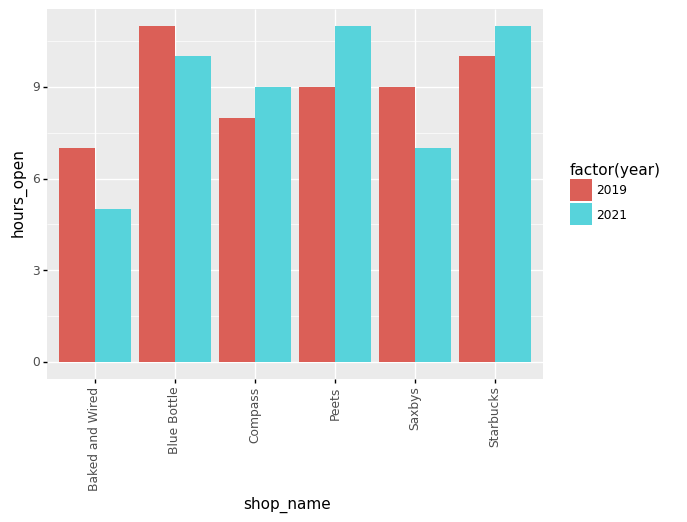

<ggplot: (8780819231916)>

In [71]:
import plotnine
from plotnine import *

(ggplot(coffee_df, aes(x = 'shop_name', y = 'hours_open',
                      group = 'factor(year)',
                      fill = 'factor(year)')) +
geom_bar(stat = 'identity', position = 'dodge') +
theme(axis_text_x= element_text(angle = 90)))